<h1>Libraries</h1>


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier


<h1>Processing<h1>

In [147]:
# Random Seed at file level
random_seed = 40
np.random.seed(random_seed)

In [148]:
#data set loading
df = pd.read_csv('dlfeatures.csv')

In [149]:
df = df.fillna(0)


In [150]:
df

,filename,gender,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200
0,AHTD3A0001_Para1.tif,1,0.196775,0.214341,0.323202,0.082428,0.083402,0.132520,0.075448,0.129393,...,0.334277,0.457827,0.167589,0.223514,0.296704,0.196817,0.225407,0.302030,0.148853,0.303619
1,AHTD3A0001_Para2.tif,1,-0.074925,0.072095,-0.142784,0.387837,0.940568,0.675403,0.245071,0.310153,...,-0.161006,-0.210443,-0.056967,-0.127965,-0.124341,-0.131250,0.107954,-0.155798,-0.079725,-0.149979
2,AHTD3A0001_Para3.tif,1,-0.127438,-0.022435,-0.214518,0.325588,0.871138,0.571669,0.184256,0.244962,...,-0.228725,-0.282050,-0.113828,-0.183149,-0.188106,-0.176147,0.011555,-0.216879,-0.112909,-0.216707
3,AHTD3A0001_Para4.tif,1,0.004752,0.160099,-0.017497,0.369546,0.818300,0.628261,0.255088,0.321703,...,-0.038916,-0.063268,0.016430,-0.036736,-0.014370,-0.048121,0.193967,-0.040983,-0.019456,-0.034036
4,AHTD3A0002_Para1.tif,1,0.242343,0.244694,0.406833,0.063161,0.035113,0.103282,0.068132,0.123782,...,0.417967,0.585452,0.202166,0.278775,0.365556,0.247351,0.254033,0.385729,0.181767,0.379763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,AHTD3A1173_Para4.tif,0,0.564839,0.581437,1.035407,0.056000,-0.107874,0.053679,0.121130,0.168222,...,1.074432,1.528023,0.499816,0.693952,0.896678,0.611772,0.566755,0.955964,0.404949,0.970752
3836,AHTD3A1181_Para1.tif,0,0.275606,0.435281,0.453585,0.288349,0.428870,0.454094,0.257358,0.320381,...,0.442120,0.589091,0.263165,0.289764,0.394234,0.243781,0.449924,0.393059,0.173653,0.408844
3837,AHTD3A1181_Para2.tif,0,0.223929,0.401891,0.367410,0.336408,0.551474,0.528757,0.284158,0.346854,...,0.353179,0.449986,0.221836,0.231047,0.317860,0.189720,0.424034,0.306379,0.141364,0.327371
3838,AHTD3A1181_Para3.tif,0,0.100292,0.238530,0.141866,0.295357,0.565209,0.490637,0.222756,0.285882,...,0.129835,0.156302,0.104067,0.081995,0.132203,0.060833,0.262659,0.109846,0.056046,0.120523


In [151]:
df = df.drop(columns=['filename'])

# Separate features and target label
features = df.drop('gender', axis=1)
target = df['gender']

In [152]:
"""
#Sampling

#---------------------------Undersampling----------------------------------------

df_majority = df[df.Class_Label == 1]  # Assuming 1 represents females
df_minority = df[df.Class_Label == 0]  # Assuming 0 represents males

# Downsample the majority class then combine
df_majority_downsampled = df_majority.sample(n = len(df_minority), random_state = random_seed)  # Ensure reproducibility with a random state
df_under_balanced = pd.concat([df_majority_downsampled, df_minority])
df_under_balanced = df_under_balanced.sample(frac=1, random_state=40).reset_index(drop=True) # Shuffle the dataset to prevent any order bias

#----------------------------------------------------------------------------------

"""

from imblearn.over_sampling import SMOTE

#Preprocessing: Standardization
standard_scaler = StandardScaler() 
X = standard_scaler.fit_transform(features) 

# Sample data loading and preparation
# X, y would be your dataset's features and labels respectively

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=40)

# Create an instance of SMOTE
smote = SMOTE(random_state=random_seed)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [153]:
X_train_resampled

array([[ 0.13133258, -0.48421169,  0.03869175, ...,  0.0863179 ,
        -1.58991784,  0.07598363],
       [-0.07406488, -0.28642143, -0.2753966 , ..., -0.22826614,
         0.02313689, -0.268075  ],
       [ 0.13133258, -0.48421169,  0.03869175, ...,  0.0863179 ,
         0.33506957,  0.07598363],
       ...,
       [ 0.49804194,  0.34890837,  0.39544864, ...,  0.37958055,
         0.64794964,  0.38839862],
       [ 2.09447932,  0.92000733,  2.40642643, ...,  2.43888736,
         2.23207117,  2.41336975],
       [-0.21159841, -0.05311234, -0.3919635 , ..., -0.39343511,
        -0.10045179, -0.38819937]])

<h1>Split<h1>

In [154]:
#Divide dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2)

<h1>Feature Selection/Dimensionality Reduction<h1>

In [155]:
# Applying PCA
#pca = PCA(n_components=3, random_state=random_seed)
#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

In [156]:
#X_train_pca

In [157]:
X_train

array([[ 0.13133258, -0.48421169,  0.03869175, ...,  0.0863179 ,
        -1.58991784,  0.07598363],
       [-0.07406488, -0.28642143, -0.2753966 , ..., -0.22826614,
         0.02313689, -0.268075  ],
       [ 0.13133258, -0.48421169,  0.03869175, ...,  0.0863179 ,
         0.33506957,  0.07598363],
       ...,
       [-0.20264256,  0.64849671, -0.39701094, ..., -0.47414521,
        -0.18164376, -0.40663308],
       [-1.17114918, -0.91652154, -1.08345779, ..., -1.05264749,
        -1.08496188, -1.06322321],
       [-0.15333031,  0.13662779, -0.33189797, ..., -0.35293794,
        -0.05867934, -0.33734509]])

<h1>Decision Trees<h1>

In [158]:
# Create directories for saving results
os.makedirs("./results", exist_ok=True)

Accuracy: 0.6783854166666666
F1 Score: 0.6806669041717437
              precision    recall  f1-score   support

           0       0.53      0.56      0.55       263
           1       0.76      0.74      0.75       505

    accuracy                           0.68       768
   macro avg       0.65      0.65      0.65       768
weighted avg       0.68      0.68      0.68       768

Classification report saved to results\classification_report.csv


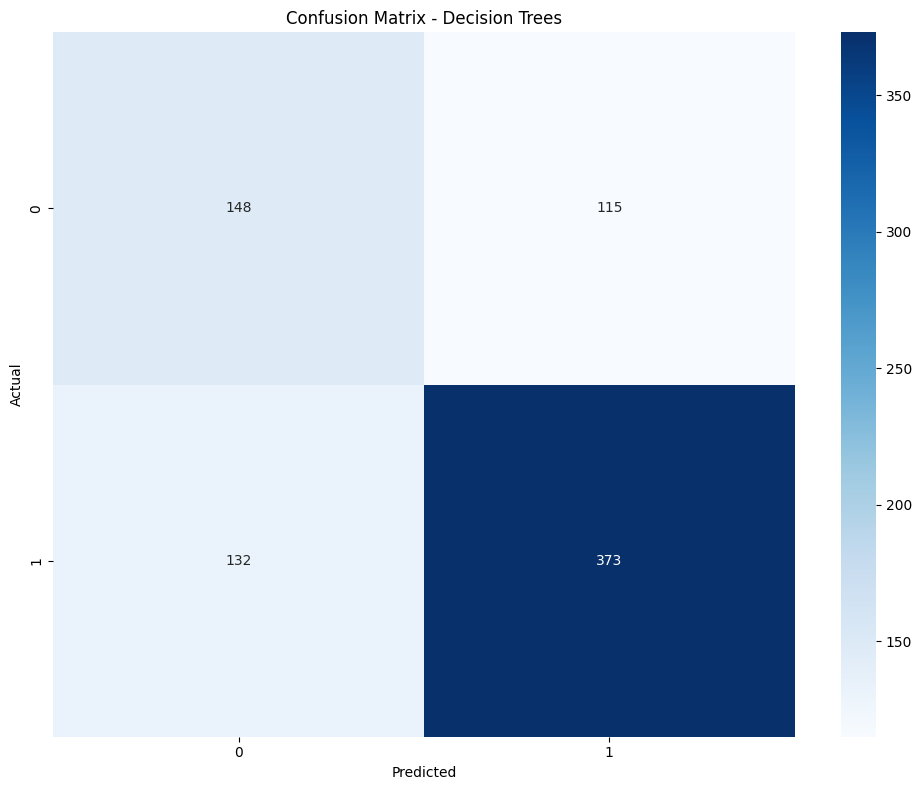

In [167]:
clf = DecisionTreeClassifier(max_depth = 30, random_state = random_seed) 
clf.fit(X_train_resampled,y_train_resampled)
y_pred = clf.predict(X_test)


# Calculate the scores
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

# Save the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

classification_report_save_path = os.path.join('results', 'classification_report.csv')
report_df.to_csv(classification_report_save_path, index=True)
print(f"Classification report saved to {classification_report_save_path}")

# Plot and save the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Trees')
plt.tight_layout()
plt.savefig(f'results/confusion_matrix.png')
plt.show()



In [160]:
"""from sklearn import tree

tree.plot_tree(clf)
"""

'from sklearn import tree\n\ntree.plot_tree(clf)\n'

<h1>Naive Bayes<h1>

Accuracy: 0.7369791666666666
F1 Score: 0.7328184773056244
              precision    recall  f1-score   support

           0       0.63      0.56      0.59       263
           1       0.78      0.83      0.81       505

    accuracy                           0.74       768
   macro avg       0.71      0.69      0.70       768
weighted avg       0.73      0.74      0.73       768

Classification report saved to results\classification_report.csv


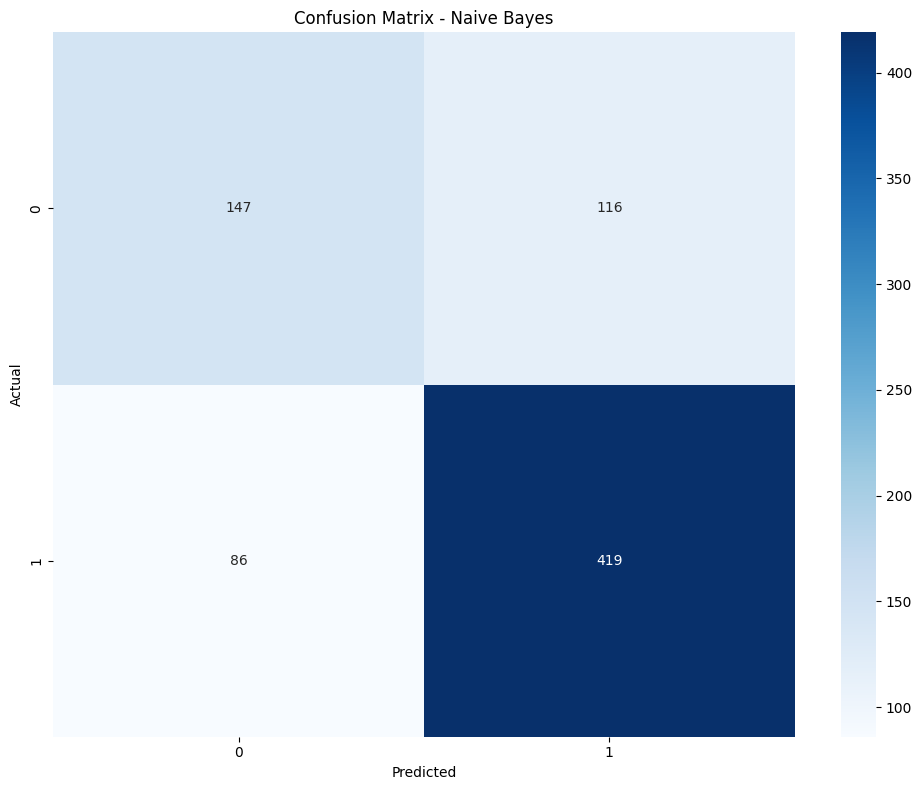

In [161]:
clf = GaussianNB() 
clf.fit(X_train,y_train)
y_pred_nb = clf.predict(X_test)


# Calculate the scores
accuracy = accuracy_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred_nb))

# Save the classification report
report = classification_report(y_test, y_pred_nb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

classification_report_save_path = os.path.join('results', 'classification_report.csv')
report_df.to_csv(classification_report_save_path, index=True)
print(f"Classification report saved to {classification_report_save_path}")

# Plot and save the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.tight_layout()
plt.savefig(f'results/confusion_matrix.png')
plt.show()


<h1>KNN<h1>

Accuracy: 0.7330729166666666
F1 Score: 0.7259118479530374
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       263
           1       0.77      0.84      0.81       505

    accuracy                           0.73       768
   macro avg       0.70      0.68      0.69       768
weighted avg       0.72      0.73      0.73       768

Classification report saved to results\classification_report.csv


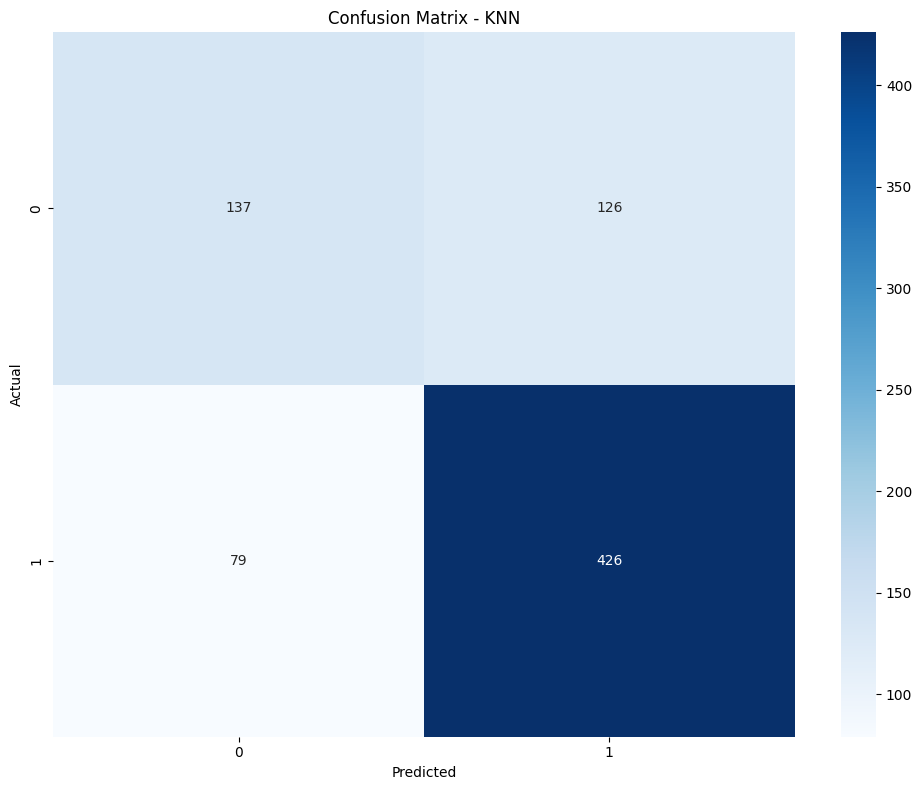

In [162]:
clf = KNeighborsClassifier(n_neighbors = 5) 
clf.fit(X_train,y_train)
y_pred_nb = clf.predict(X_test)

# Calculate the scores
accuracy = accuracy_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred_nb))

# Save the classification report
report = classification_report(y_test, y_pred_nb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

classification_report_save_path = os.path.join('results', 'classification_report.csv')
report_df.to_csv(classification_report_save_path, index=True)
print(f"Classification report saved to {classification_report_save_path}")

# Plot and save the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.tight_layout()
plt.savefig(f'results/confusion_matrix.png')
plt.show()

<h1>SVM<h1>

In [163]:
#hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the model
svm = SVC()

# Set up the parameter grid. You can adjust the ranges and values based on your computational capacity and dataset.
param_grid = {
    'C': [0.1, 1, 20],  # Example values
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1,5],  # Example values
    'degree': [2, 4],  # Only used for 'poly' kernel
    'coef0': [0, 0.5]  # Only used for 'poly' and 'sigmoid'
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)  # n_jobs=-1 to use all available cores

# Fit GridSearchCV on your training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 180 candidates, totalling 900 fits


KeyboardInterrupt: 

Accuracy: 0.7591145833333334
F1 Score: 0.7447975013739411
              precision    recall  f1-score   support

           0       0.72      0.48      0.58       263
           1       0.77      0.90      0.83       505

    accuracy                           0.76       768
   macro avg       0.75      0.69      0.70       768
weighted avg       0.75      0.76      0.74       768

Classification report saved to results\classification_report.csv


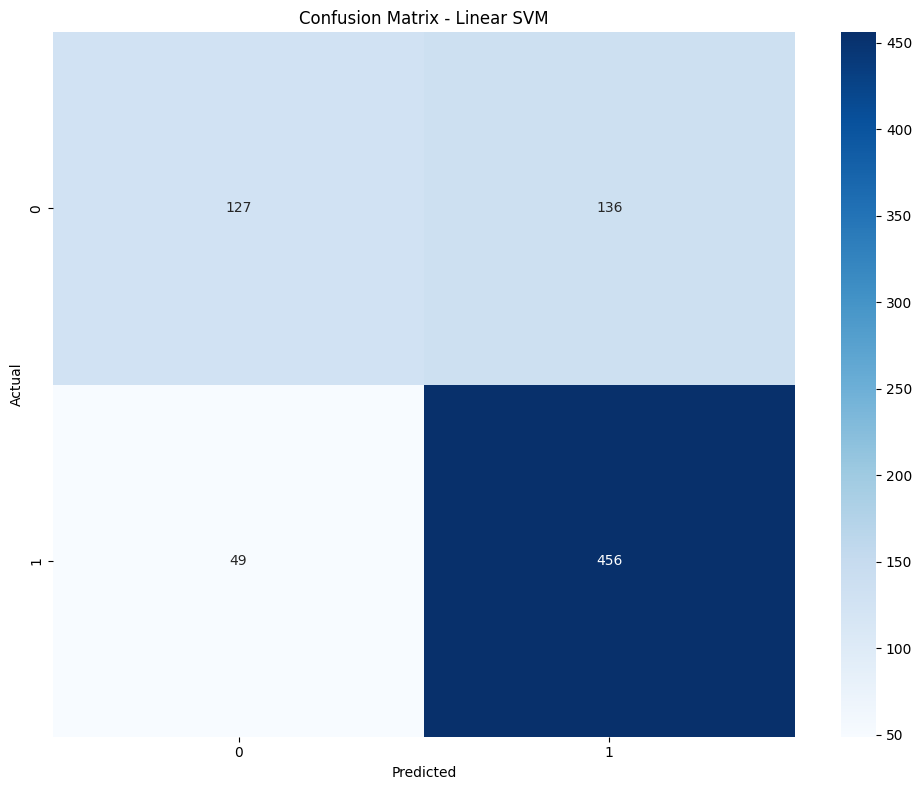

In [164]:
#clf = LinearSVC(random_state= random_seed) 
clf = SVC(kernel='linear', C=1, gamma= 'auto', degree = 2, coef0 = 0 );
#clf = SVC(C = 2,gamma = 0.1 ,kernel='linear', random_state= random_seed)
clf.fit(X_train,y_train)
y_pred_nb = clf.predict(X_test)


# Calculate the scores
accuracy = accuracy_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred_nb))

# Save the classification report
report = classification_report(y_test, y_pred_nb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

classification_report_save_path = os.path.join('results', 'classification_report.csv')
report_df.to_csv(classification_report_save_path, index=True)
print(f"Classification report saved to {classification_report_save_path}")

# Plot and save the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear SVM')
plt.tight_layout()
plt.savefig(f'results/confusion_matrix.png')
plt.show()

In [165]:
clf = XGBClassifier(random_state=random_seed)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57       263
           1       0.77      0.85      0.81       505

    accuracy                           0.74       768
   macro avg       0.71      0.68      0.69       768
weighted avg       0.73      0.74      0.73       768

